<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2011/extras/s11-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-khc357tn
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-khc357tn
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=8d5381a2baaf49a6e8a44c5194e119ca658bfe1044c80f0be7b4c66c25edf3ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-4dxnrdyf/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [2]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/eva_files'
sys.path.append(folder)

In [5]:
%matplotlib inline
import torch
import data_loading
import show_images
import dnn_architecture
import train_and_test
import evaluate
import gradcam
import lr_finder

  pip install torch-lr-finder -v --global-option="amp"


Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
shape: torch.Size([512, 3, 32, 32])
  cat truck truck   cat


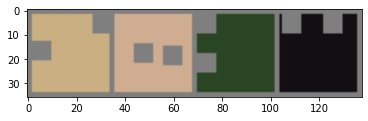

In [6]:
import albumentations as A
import cv2

train_aug = [A.PadIfNeeded(border_mode=cv2.BORDER_REPLICATE, p=1.0),
             A.RandomCrop(32, 32, always_apply=False, p=1.0),
             A.HorizontalFlip(),
             A.Cutout(num_holes=2, max_h_size=8,max_w_size = 8,p=1,fill_value=0.5*255), # after normalizing as mean is 0, thus fillvalue=0
             A.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)),]

classes, trainloader, testloader = data_loading.load(train_augmentation = train_aug,mode='default_test_aug',gpu_batch_size=512)

show_images.show_random_images(trainloader, classes)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
shape: torch.Size([512, 3, 32, 32])
  cat truck truck   cat


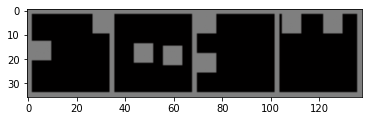

In [39]:
import albumentations as A
import cv2

train_aug = [A.PadIfNeeded(border_mode=cv2.BORDER_CONSTANT,value=2,mask_value=2, p=1.0),
             A.RandomCrop(32, 32, always_apply=False, p=1.0),
             A.HorizontalFlip(),
             A.Cutout(num_holes=2, max_h_size=8,max_w_size = 8,p=1,fill_value=0.5*255), # after normalizing as mean is 0, thus fillvalue=0
             A.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)),]

classes, trainloader, testloader = data_loading.load(train_augmentation = train_aug,mode='default_test_aug',gpu_batch_size=512)

show_images.show_random_images(trainloader, classes)

In [7]:
import albumentations as A
train_aug = [A.PadIfNeeded(min_height=36, min_width=36,p=1.0),
            #  A.RandomCrop(32, 32, always_apply=False, p=1.0),
             A.HorizontalFlip(),
             A.Cutout(num_holes=2, max_h_size=8,max_w_size = 8,p=1,fill_value=0.5*255), # after normalizing as mean is 0, thus fillvalue=0
             A.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)),]

classes, trainloader, testloader = data_loading.load(train_augmentation = train_aug,mode='default_test_aug',gpu_batch_size=512)


Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


to see if padding is applied

shape: torch.Size([512, 3, 36, 36])
  cat truck truck   cat


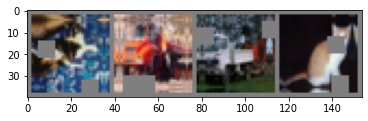

In [8]:
show_images.show_random_images(trainloader, classes)

In [9]:
import albumentations as A
train_aug = [A.RandomCrop(32, 32, always_apply=False, p=1.0),
             A.HorizontalFlip(),
             A.Cutout(num_holes=2, max_h_size=8,max_w_size = 8,p=1,fill_value=0.5*255), # after normalizing as mean is 0, thus fillvalue=0
             A.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)),]

classes, trainloader, testloader = data_loading.load(train_augmentation = train_aug,mode='default_test_aug')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat


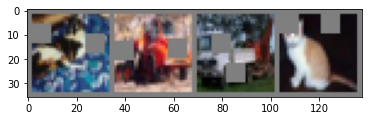

In [10]:
show_images.show_random_images(trainloader, classes)

In [40]:
import albumentations as A
train_aug = [A.PadIfNeeded(min_height=36, min_width=36,p=1.0),
             A.RandomCrop(32, 32, always_apply=False, p=1.0),
             A.HorizontalFlip(),
             A.Cutout(num_holes=2, max_h_size=8,max_w_size = 8,p=1,fill_value=0.5*255), # after normalizing as mean is 0, thus fillvalue=0
             A.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)),]

classes, trainloader, testloader = data_loading.load(train_augmentation = train_aug,mode='default_test_aug',gpu_batch_size=512)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([512, 3, 32, 32])
  cat truck truck   cat


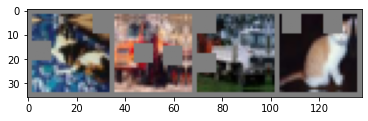

In [7]:
show_images.show_random_images(trainloader, classes)

In [0]:
import matplotlib.pyplot as plt

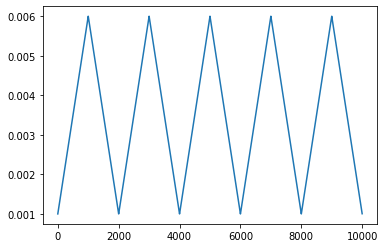

In [14]:
# Sample cyclic lr code :

import matplotlib.pyplot as plt
import numpy as np
def CyclicLR(num_iterations,base_lr,max_lr,step_size):
  l_rate =[]
  for iteration in range(num_iterations):
    cycle = np.floor(1+iteration/(2*step_size))
    x = np.abs(iteration/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    l_rate.append(lr)
  plt.plot(list(range(num_iterations)),l_rate)

CyclicLR(num_iterations=10000,base_lr=0.001, max_lr=0.006,step_size=1000)

Write a code which

uses this new ResNet Architecture for Cifar10:

* PrepLayer - Conv 3x3 s1, p1) >> BN >> RELU [64k]

* Layer1 -
1. X = Conv 3x3 (s1, p1) >> MaxPool2D >> BN >> RELU [128k]
2. R1 = ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [128k] 
(Conv-BN-ReLU-Conv-BN-ReLU)
3. Add(X, R1)

* Layer 2 -
1. Conv 3x3 [256k]
2. MaxPooling2D
3. BN
4. ReLU

* Layer 3 -
1. X = Conv 3x3 (s1, p1) >> MaxPool2D >> BN >> RELU [512k]
2. R2 = ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [512k]
3. Add(X, R2)
* MaxPooling with Kernel Size 4
* FC Layer 
* SoftMax

* Uses One Cycle Policy such that:
1. Total Epochs = 24
2. Max at Epoch = 5
3. LRMIN = FIND
4. LRMAX = FIND
5. NO Annihilation
6. Uses this transform -RandomCrop 32, 32 (after padding of 4) >> FlipLR >> Followed by CutOut(8, 8)

Batch size = 512

Target Accuracy: 90%. 

The lesser the modular your code is (i.e. more the code you have written in your Colab file), less marks you'd get. 

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class New_Resnet(nn.Module):
    def __init__(self):
        super(New_Resnet,self).__init__()

        self.prepLayer = nn.Sequential(
                    nn.Conv2d(in_channels=3,out_channels=64,kernel_size=(3,3),bias=False,padding=1,stride=1),
                    nn.BatchNorm2d(64),
                    nn.ReLU(),
                )
        
        self.cmbr_block1 = self._CMBR_Block(64,128)
        self.res_block1 = self._ResBlock(128,128)

        self.layer2 = self._CMBR_Block(128,256)

        self.cmbr_block2 = self._CMBR_Block(256,512)
        self.res_block2 = self._ResBlock(512,512)

        self.MP4x4 = nn.MaxPool2d(4,4)

        self.fc = nn.Conv2d(in_channels=512,out_channels=10,kernel_size=(1,1),bias=False,padding=0,stride=1)
    
    def _ResBlock(self,in_channels,out_channels):

        return nn.Sequential(
            nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=(3,3),bias=False,stride=1,padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels=out_channels,out_channels=out_channels,kernel_size=(3,3),bias=False,stride=1,padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

        
    def _CMBR_Block(self,in_channels,out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=(3,3),bias=False,padding=1,stride=1),
            nn.MaxPool2d(2,2),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
    def forward(self,x):
      # PrepLayer
      x = self.prepLayer(x)
      # Layer 1
      x = self.cmbr_block1(x)
      r1 = self.res_block1(x)
      x = x + r1
      # Layer 2
      x = self.layer2(x)
      # Layer 3
      x = self.cmbr_block2(x)
      r2 = self.res_block2(x)
      x = x + r2

      x = self.MP4x4(x)
      x = self.fc(x)
      x = x.view(-1, 10)
      return F.log_softmax(x, dim=-1)


In [13]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = New_Resnet().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

range test for lr 0.1 - 0.0001

In [0]:

# class Train_test:
  
#   def __init__(self):
#     self.train_losses = []
#     self.test_losses = []
#     self.train_acc = []
#     self.test_acc = []
#     self.train_acc_epoch_end = []

#   def train_and_test(self,model, device, train_loader,test_loader, optimizer, criterion, epoch):
      
    
#     self.train_acc,self.train_acc_epoch_end,self.train_losses = self.train(model, device, train_loader, optimizer, criterion)
#     self.test_losses,self.test_acc = self.test(model, device, criterion, test_loader)
#     return self.train_acc,self.train_acc_epoch_end,self.train_losses,self.test_losses,self.test_acc


#   def train(self,model, device, train_loader, optimizer, criterion):

#     import torch
#     #Training & Testing Loops
#     from tqdm import tqdm

#     model.train()
#     pbar = tqdm(train_loader)
#     correct = 0
#     processed = 0
#     for batch_idx, (data, target) in enumerate(pbar):
#       # get samples
#       data, target = data.to(device), target.to(device)

#       # Init
#       optimizer.zero_grad()
#       # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
#       # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

#       # Predict
#       y_pred = model(data)

#       # Calculate loss
#       #loss = F.nll_loss(y_pred, target)
#       loss = criterion(y_pred, target)
#       self.train_losses.append(loss)

#       # Backpropagation
#       loss.backward()
#       optimizer.step()

#       # Update pbar-tqdm
      
#       pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
#       correct += pred.eq(target.view_as(pred)).sum().item()
#       processed += len(data)

#       pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
#       self.train_acc.append(100*correct/processed)
#     self.train_acc_epoch_end.append(self.train_acc[-1])
#     return self.train_acc,self.train_acc_epoch_end,self.train_losses


#   def test(self,model, device, criterion, test_loader):

#       import torch
#     #Training & Testing Loops
#       from tqdm import tqdm

#       model.eval()
#       test_loss = 0
#       correct = 0
#       with torch.no_grad():
#           for data, target in test_loader:
#               data, target = data.to(device), target.to(device)
#               output = model(data)
#               test_loss += criterion(output, target).item()  # sum up batch loss
#               pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
#               correct += pred.eq(target.view_as(pred)).sum().item()
              

#       test_loss /= len(test_loader.dataset)
#       self.test_losses.append(test_loss)

#       print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
#           test_loss, correct, len(test_loader.dataset),
#           100. * correct / len(test_loader.dataset)))
      
#       self.test_acc.append(100. * correct / len(test_loader.dataset))
#       return self.test_losses,self.test_acc

In [15]:
lrs = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,
      0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,
      0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9,weight_decay=0.0005)

trainAcc = []
testAcc = []
trainLoss = []
testLoss = []

for lr in lrs:
  epoch=0
  optimizer.param_groups[0]['lr'] = lr
  print('LR:',optimizer.param_groups[0]['lr'])


  # train_and_test.train(model, device, trainloader, optimizer, criterion, epoch)
  # train_and_test.test(model, device, criterion, testloader,epoch)
  train_test = train_and_test.Train_test()

  train_acc,train_acc_epoch_end,train_losses,test_losses,test_acc = train_test.train_and_test(model, device, trainloader,testloader, optimizer, criterion, epoch)
  
  trainAcc.append(train_acc_epoch_end[0])
  testAcc.append(test_acc[0])
  trainLoss.append(train_losses[0])
  testLoss.append(test_losses[0])

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  model = New_Resnet().to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9,weight_decay=0.0005)

  # print(len(train_acc),train_acc_epoch_end,test_acc,train_losses,test_losses)


  0%|          | 0/98 [00:00<?, ?it/s]

LR: 0.0001


Loss=1.9309526681900024 Batch_id=97 Accuracy=22.11: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 3186/10000 (31.86%)

LR: 0.0002


Loss=1.7255094051361084 Batch_id=97 Accuracy=27.53: 100%|██████████| 98/98 [00:20<00:00,  4.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 3915/10000 (39.15%)

LR: 0.0003


Loss=1.6826237440109253 Batch_id=97 Accuracy=29.70: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 4218/10000 (42.18%)

LR: 0.0004


Loss=1.6106171607971191 Batch_id=97 Accuracy=31.73: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 4347/10000 (43.47%)

LR: 0.0005


Loss=1.5360090732574463 Batch_id=97 Accuracy=33.42: 100%|██████████| 98/98 [00:20<00:00,  4.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 4643/10000 (46.43%)

LR: 0.0006


Loss=1.5132018327713013 Batch_id=97 Accuracy=35.35: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 4648/10000 (46.48%)

LR: 0.0007


Loss=1.4926918745040894 Batch_id=97 Accuracy=36.38: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 4836/10000 (48.36%)

LR: 0.0008


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 4772/10000 (47.72%)

LR: 0.0009


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5101/10000 (51.01%)

LR: 0.001


Loss=1.4342423677444458 Batch_id=97 Accuracy=38.10: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5155/10000 (51.55%)

LR: 0.002


Loss=1.225770354270935 Batch_id=97 Accuracy=41.37: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 5440/10000 (54.40%)

LR: 0.003


Loss=1.242448329925537 Batch_id=97 Accuracy=43.66: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5486/10000 (54.86%)

LR: 0.004


Loss=1.3121954202651978 Batch_id=97 Accuracy=41.67: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5402/10000 (54.02%)

LR: 0.005


Loss=1.2160478830337524 Batch_id=97 Accuracy=43.50: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 5347/10000 (53.47%)

LR: 0.006


Loss=1.2484673261642456 Batch_id=97 Accuracy=42.88: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 5856/10000 (58.56%)

LR: 0.007


Loss=1.5200711488723755 Batch_id=97 Accuracy=34.50: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 4572/10000 (45.72%)

LR: 0.008


Loss=1.6581358909606934 Batch_id=97 Accuracy=26.91: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 3932/10000 (39.32%)

LR: 0.009


Loss=1.7723604440689087 Batch_id=97 Accuracy=21.98: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 3434/10000 (34.34%)

LR: 0.01


Loss=1.6721583604812622 Batch_id=97 Accuracy=24.06: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 3250/10000 (32.50%)

LR: 0.02


Loss=2.307046890258789 Batch_id=97 Accuracy=13.73: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 1457/10000 (14.57%)

LR: 0.03


Loss=2.649186611175537 Batch_id=97 Accuracy=12.74: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 1663/10000 (16.63%)

LR: 0.04


Loss=2.347414016723633 Batch_id=97 Accuracy=11.85: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 1535/10000 (15.35%)

LR: 0.05


Loss=2.498605489730835 Batch_id=97 Accuracy=11.81: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 1345/10000 (13.45%)

LR: 0.06


Loss=2.4315741062164307 Batch_id=97 Accuracy=10.50: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 1013/10000 (10.13%)

LR: 0.07


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 1255/10000 (12.55%)

LR: 0.08


Loss=2.1871814727783203 Batch_id=97 Accuracy=12.10: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 1496/10000 (14.96%)

LR: 0.09


Loss=2.287975788116455 Batch_id=97 Accuracy=10.89: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 1197/10000 (11.97%)

LR: 0.1


Loss=2.2904820442199707 Batch_id=97 Accuracy=10.84: 100%|██████████| 98/98 [00:20<00:00,  4.77it/s]



Test set: Average loss: 0.0046, Accuracy: 1168/10000 (11.68%)



In [16]:
print(len(train_acc_epoch_end))

1


In [17]:
print('Train acc: ',max(trainAcc),'LR: ',lrs[trainAcc.index(max(trainAcc))])
print('Test acc: ',max(testAcc),'LR: ',lrs[testAcc.index(max(testAcc))])

Train acc:  43.66 LR:  0.003
Test acc:  58.56 LR:  0.006


Text(0, 0.5, 'Train Accuracy')

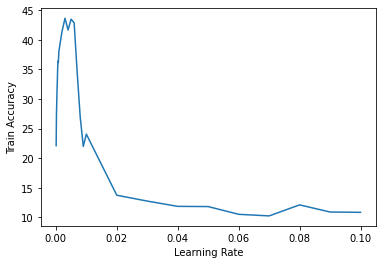

In [18]:
import matplotlib.pyplot as plt
plt.plot(lrs,trainAcc)
plt.xlabel('Learning Rate')
plt.ylabel('Train Accuracy')

Text(0, 0.5, 'Test Accuracy')

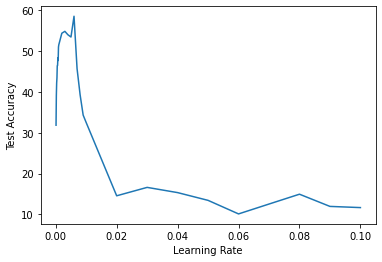

In [19]:
plt.plot(lrs,testAcc)
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')

In [21]:
len(optimizer.param_groups)

1

In [0]:
print(optimizer.param_groups[1]['initial_lr'])

IndexError: ignored

In [0]:
# Code from https://pytorch.org/docs/stable/_modules/torch/optim/lr_scheduler.html#OneCycleLR


class OneCycleLR(_LRScheduler):
    r"""Sets the learning rate of each parameter group according to the
    1cycle learning rate policy. The 1cycle policy anneals the learning
    rate from an initial learning rate to some maximum learning rate and then
    from that maximum learning rate to some minimum learning rate much lower
    than the initial learning rate.
    This policy was initially described in the paper `Super-Convergence:
    Very Fast Training of Neural Networks Using Large Learning Rates`_.

    The 1cycle learning rate policy changes the learning rate after every batch.
    `step` should be called after a batch has been used for training.

    This scheduler is not chainable.

    Note also that the total number of steps in the cycle can be determined in one
    of two ways (listed in order of precedence):

    #. A value for total_steps is explicitly provided.
    #. A number of epochs (epochs) and a number of steps per epoch
       (steps_per_epoch) are provided.
       In this case, the number of total steps is inferred by
       total_steps = epochs * steps_per_epoch

    You must either provide a value for total_steps or provide a value for both
    epochs and steps_per_epoch.

    Args:
        optimizer (Optimizer): Wrapped optimizer.
        max_lr (float or list): Upper learning rate boundaries in the cycle
            for each parameter group.
        total_steps (int): The total number of steps in the cycle. Note that
            if a value is provided here, then it must be inferred by providing
            a value for epochs and steps_per_epoch.
            Default: None
        epochs (int): The number of epochs to train for. This is used along
            with steps_per_epoch in order to infer the total number of steps in the cycle
            if a value for total_steps is not provided.
            Default: None
        steps_per_epoch (int): The number of steps per epoch to train for. This is
            used along with epochs in order to infer the total number of steps in the
            cycle if a value for total_steps is not provided.
            Default: None
        pct_start (float): The percentage of the cycle (in number of steps) spent
            increasing the learning rate.
            Default: 0.3
        anneal_strategy (str): {'cos', 'linear'}
            Specifies the annealing strategy: "cos" for cosine annealing, "linear" for
            linear annealing.
            Default: 'cos'
        cycle_momentum (bool): If ``True``, momentum is cycled inversely
            to learning rate between 'base_momentum' and 'max_momentum'.
            Default: True
        base_momentum (float or list): Lower momentum boundaries in the cycle
            for each parameter group. Note that momentum is cycled inversely
            to learning rate; at the peak of a cycle, momentum is
            'base_momentum' and learning rate is 'max_lr'.
            Default: 0.85
        max_momentum (float or list): Upper momentum boundaries in the cycle
            for each parameter group. Functionally,
            it defines the cycle amplitude (max_momentum - base_momentum).
            Note that momentum is cycled inversely
            to learning rate; at the start of a cycle, momentum is 'max_momentum'
            and learning rate is 'base_lr'
            Default: 0.95
        div_factor (float): Determines the initial learning rate via
            initial_lr = max_lr/div_factor
            Default: 25
        final_div_factor (float): Determines the minimum learning rate via
            min_lr = initial_lr/final_div_factor
            Default: 1e4
        last_epoch (int): The index of the last batch. This parameter is used when
            resuming a training job. Since `step()` should be invoked after each
            batch instead of after each epoch, this number represents the total
            number of *batches* computed, not the total number of epochs computed.
            When last_epoch=-1, the schedule is started from the beginning.
            Default: -1

    Example:
        >>> data_loader = torch.utils.data.DataLoader(...)
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
        >>> scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(data_loader), epochs=10)
        >>> for epoch in range(10):
        >>>     for batch in data_loader:
        >>>         train_batch(...)
        >>>         scheduler.step()


    .. _Super-Convergence\: Very Fast Training of Neural Networks Using Large Learning Rates:
        https://arxiv.org/abs/1708.07120
    """
    def __init__(self,
                 optimizer,
                 max_lr,
                 total_steps=None,
                 epochs=None,
                 steps_per_epoch=None,
                 pct_start=0.3,
                 anneal_strategy='cos',
                 cycle_momentum=True,
                 base_momentum=0.85,
                 max_momentum=0.95,
                 div_factor=25.,
                 final_div_factor=1e4,
                 last_epoch=-1):

        # Validate optimizer
        if not isinstance(optimizer, Optimizer):
            raise TypeError('{} is not an Optimizer'.format(
                type(optimizer).__name__))
        self.optimizer = optimizer

        # Validate total_steps
        if total_steps is None and epochs is None and steps_per_epoch is None:
            raise ValueError("You must define either total_steps OR (epochs AND steps_per_epoch)")
        elif total_steps is not None:
            if total_steps <= 0 or not isinstance(total_steps, int):
                raise ValueError("Expected non-negative integer total_steps, but got {}".format(total_steps))
            self.total_steps = total_steps
        else:
            if epochs <= 0 or not isinstance(epochs, int):
                raise ValueError("Expected non-negative integer epochs, but got {}".format(epochs))
            if steps_per_epoch <= 0 or not isinstance(steps_per_epoch, int):
                raise ValueError("Expected non-negative integer steps_per_epoch, but got {}".format(steps_per_epoch))
            self.total_steps = epochs * steps_per_epoch
        self.step_size_up = float(pct_start * self.total_steps) - 1
        self.step_size_down = float(self.total_steps - self.step_size_up) - 1

        # Validate pct_start
        if pct_start < 0 or pct_start > 1 or not isinstance(pct_start, float):
            raise ValueError("Expected float between 0 and 1 pct_start, but got {}".format(pct_start))

        # Validate anneal_strategy
        if anneal_strategy not in ['cos', 'linear']:
            raise ValueError("anneal_strategy must by one of 'cos' or 'linear', instead got {}".format(anneal_strategy))
        elif anneal_strategy == 'cos':
            self.anneal_func = self._annealing_cos
        elif anneal_strategy == 'linear':
            self.anneal_func = self._annealing_linear

        # Initialize learning rate variables
        max_lrs = self._format_param('max_lr', self.optimizer, max_lr)
        if last_epoch == -1:
            for idx, group in enumerate(self.optimizer.param_groups):
                group['initial_lr'] = max_lrs[idx] / div_factor
                group['max_lr'] = max_lrs[idx]
                group['min_lr'] = group['initial_lr'] / final_div_factor

        # Initialize momentum variables
        self.cycle_momentum = cycle_momentum
        if self.cycle_momentum:
            if 'momentum' not in self.optimizer.defaults and 'betas' not in self.optimizer.defaults:
                raise ValueError('optimizer must support momentum with `cycle_momentum` option enabled')
            self.use_beta1 = 'betas' in self.optimizer.defaults
            max_momentums = self._format_param('max_momentum', optimizer, max_momentum)
            base_momentums = self._format_param('base_momentum', optimizer, base_momentum)
            if last_epoch == -1:
                for m_momentum, b_momentum, group in zip(max_momentums, base_momentums, optimizer.param_groups):
                    if self.use_beta1:
                        _, beta2 = group['betas']
                        group['betas'] = (m_momentum, beta2)
                    else:
                        group['momentum'] = m_momentum
                    group['max_momentum'] = m_momentum
                    group['base_momentum'] = b_momentum

        super(OneCycleLR, self).__init__(optimizer, last_epoch)

    def _format_param(self, name, optimizer, param):
        """Return correctly formatted lr/momentum for each param group."""
        if isinstance(param, (list, tuple)):
            if len(param) != len(optimizer.param_groups):
                raise ValueError("expected {} values for {}, got {}".format(
                    len(optimizer.param_groups), name, len(param)))
            return param
        else:
            return [param] * len(optimizer.param_groups)

    def _annealing_cos(self, start, end, pct):
        "Cosine anneal from `start` to `end` as pct goes from 0.0 to 1.0."
        cos_out = math.cos(math.pi * pct) + 1
        return end + (start - end) / 2.0 * cos_out

    def _annealing_linear(self, start, end, pct):
        "Linearly anneal from `start` to `end` as pct goes from 0.0 to 1.0."
        return (end - start) * pct + start

    def get_lr(self):
        if not self._get_lr_called_within_step:
            warnings.warn("To get the last learning rate computed by the scheduler, "
                          "please use `get_last_lr()`.", DeprecationWarning)

        lrs = []
        step_num = self.last_epoch

        if step_num > self.total_steps:
            raise ValueError("Tried to step {} times. The specified number of total steps is {}"
                             .format(step_num + 1, self.total_steps))

        for group in self.optimizer.param_groups:
            if step_num <= self.step_size_up:
                computed_lr = self.anneal_func(group['initial_lr'], group['max_lr'], step_num / self.step_size_up)
                if self.cycle_momentum:
                    computed_momentum = self.anneal_func(group['max_momentum'], group['base_momentum'],
                                                         step_num / self.step_size_up)
            else:
                down_step_num = step_num - self.step_size_up
                computed_lr = self.anneal_func(group['max_lr'], group['min_lr'], down_step_num / self.step_size_down)
                if self.cycle_momentum:
                    computed_momentum = self.anneal_func(group['base_momentum'], group['max_momentum'],
                                                         down_step_num / self.step_size_down)

            lrs.append(computed_lr)
            if self.cycle_momentum:
                if self.use_beta1:
                    _, beta2 = group['betas']
                    group['betas'] = (computed_momentum, beta2)
                else:
                    group['momentum'] = computed_momentum

        return lrs

"""
 in the above code:
        self.step_size_up  - no. of epochs till which lr should increase
        self.step_size_down  - no. of epochs till which lr should decrease
  The above is concluded on examining get_lr() --> step_num = self.last_epoch , if step_num <= self.step_size_up

  group['initial_lr'], group['max_lr'] are used to cal. increasing lr for the next epoch till the peak is reached.
  group['max_lr'], group['min_lr'] used to cal. decreasing lr for the next epoch

  Thus,for anneal_strategy='linear' to get lr values that start n end with similar value i.e to get n 
  exact '^', div_factor and final_div_factor should be set to same value since lr values increase linearly,
  with formula (end - start) * pct + start and,

  group['initial_lr'] = max_lrs[idx] / div_factor
  group['min_lr'] = group['initial_lr'] / final_div_factor


"""

In [0]:
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.optim as optim

def train_model(EPOCHS=24,lr=0.0025,max_lr=0.0025, total_steps=None, epochs=5, steps_per_epoch=5,
                        pct_start=0.21, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85,
                        max_momentum=0.95, div_factor=10.0, final_div_factor=10000.0, last_epoch=-1):
  
  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  model = New_Resnet().to(device)

  lr = lr
  max_lr = max_lr
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9,weight_decay=0.0005)
  scheduler = OneCycleLR(optimizer, max_lr, total_steps=total_steps, epochs=epochs, steps_per_epoch=steps_per_epoch,
                        pct_start=pct_start, anneal_strategy=anneal_strategy, cycle_momentum=cycle_momentum, base_momentum=base_momentum,
                        max_momentum=max_momentum, div_factor=div_factor, final_div_factor=final_div_factor, last_epoch=last_epoch)

  EPOCHS = EPOCHS
  l_rate = []
  train_test = train_and_test.Train_test()
  for epoch in range(EPOCHS):
      print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
      l_rate.append(optimizer.param_groups[0]['lr'])
      train_acc,train_acc_epoch_end,train_losses,test_losses,test_acc = train_test.train_and_test(model, device, trainloader,testloader, optimizer, criterion, epoch)
  
      # train_and_test.train(model, device, trainloader, optimizer, criterion, epoch)
      # train_and_test.test(model, device, criterion, testloader,epoch)
      scheduler.step()
  print(l_rate)
  plt.plot(l_rate)
  return train_acc,train_acc_epoch_end,train_losses,test_losses,test_acc

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00030000000000000003


Loss=1.7134764194488525 Batch_id=97 Accuracy=30.39: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 4226/10000 (42.26%)

EPOCH: 2 LR: 0.00041157024793388435


Loss=1.412257432937622 Batch_id=97 Accuracy=45.76: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5082/10000 (50.82%)

EPOCH: 3 LR: 0.0005231404958677687


Loss=1.259717583656311 Batch_id=97 Accuracy=52.27: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5619/10000 (56.19%)

EPOCH: 4 LR: 0.000634710743801653


Loss=1.2061536312103271 Batch_id=97 Accuracy=56.96: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 6014/10000 (60.14%)

EPOCH: 5 LR: 0.0007462809917355372


Loss=1.0188781023025513 Batch_id=97 Accuracy=60.59: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 6316/10000 (63.16%)

EPOCH: 6 LR: 0.0008578512396694215


Loss=1.0443403720855713 Batch_id=97 Accuracy=64.10: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 6547/10000 (65.47%)

EPOCH: 7 LR: 0.0009694214876033059


Loss=0.8354161381721497 Batch_id=97 Accuracy=66.51: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 6671/10000 (66.71%)

EPOCH: 8 LR: 0.0010809917355371903


Loss=0.9323102235794067 Batch_id=97 Accuracy=68.82: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 7034/10000 (70.34%)

EPOCH: 9 LR: 0.0011925619834710745


Loss=0.8353061676025391 Batch_id=97 Accuracy=70.79: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7093/10000 (70.93%)

EPOCH: 10 LR: 0.001304132231404959


Loss=0.7360923886299133 Batch_id=97 Accuracy=72.98: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7314/10000 (73.14%)

EPOCH: 11 LR: 0.001415702479338843


Loss=0.7240134477615356 Batch_id=97 Accuracy=74.45: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7480/10000 (74.80%)

EPOCH: 12 LR: 0.0015272727272727274


Loss=0.6918179392814636 Batch_id=97 Accuracy=76.12: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7261/10000 (72.61%)

EPOCH: 13 LR: 0.0016388429752066118


Loss=0.7371895909309387 Batch_id=97 Accuracy=77.06: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7746/10000 (77.46%)

EPOCH: 14 LR: 0.0017504132231404958


Loss=0.5837465524673462 Batch_id=97 Accuracy=78.43: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7825/10000 (78.25%)

EPOCH: 15 LR: 0.0018619834710743807


Loss=0.6575842499732971 Batch_id=97 Accuracy=79.69: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7896/10000 (78.96%)

EPOCH: 16 LR: 0.0019735537190082647


Loss=0.537581741809845 Batch_id=97 Accuracy=80.84: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7881/10000 (78.81%)

EPOCH: 17 LR: 0.002085123966942149


Loss=0.5988413691520691 Batch_id=97 Accuracy=81.71: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7918/10000 (79.18%)

EPOCH: 18 LR: 0.002196694214876033


Loss=0.47382545471191406 Batch_id=97 Accuracy=82.42: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7956/10000 (79.56%)

EPOCH: 19 LR: 0.0023082644628099175


Loss=0.5355037450790405 Batch_id=97 Accuracy=83.25: 100%|██████████| 98/98 [00:20<00:00,  4.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8148/10000 (81.48%)

EPOCH: 20 LR: 0.002419834710743802


Loss=0.5857768058776855 Batch_id=97 Accuracy=83.66: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8221/10000 (82.21%)

EPOCH: 21 LR: 0.002531404958677686


Loss=0.3854976296424866 Batch_id=97 Accuracy=84.90: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7946/10000 (79.46%)

EPOCH: 22 LR: 0.0026429752066115704


Loss=0.40826788544654846 Batch_id=97 Accuracy=85.60: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8187/10000 (81.87%)

EPOCH: 23 LR: 0.002754545454545455


Loss=0.44219884276390076 Batch_id=97 Accuracy=86.18: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8319/10000 (83.19%)

EPOCH: 24 LR: 0.002866115702479339


Loss=0.30695661902427673 Batch_id=97 Accuracy=86.91: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]



Test set: Average loss: 0.0010, Accuracy: 8367/10000 (83.67%)

[0.00030000000000000003, 0.00041157024793388435, 0.0005231404958677687, 0.000634710743801653, 0.0007462809917355372, 0.0008578512396694215, 0.0009694214876033059, 0.0010809917355371903, 0.0011925619834710745, 0.001304132231404959, 0.001415702479338843, 0.0015272727272727274, 0.0016388429752066118, 0.0017504132231404958, 0.0018619834710743807, 0.0019735537190082647, 0.002085123966942149, 0.002196694214876033, 0.0023082644628099175, 0.002419834710743802, 0.002531404958677686, 0.0026429752066115704, 0.002754545454545455, 0.002866115702479339]


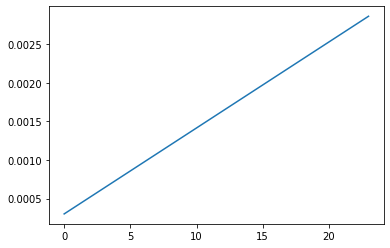

In [24]:

train_model(EPOCHS=24, total_steps=None, epochs=24, steps_per_epoch=5,
                        pct_start=0.21, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85,
                        max_momentum=0.95, div_factor=10.0, final_div_factor=10000.0, last_epoch=-1)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00030000000000000003


Loss=1.0647209882736206 Batch_id=390 Accuracy=43.07: 100%|██████████| 391/391 [00:20<00:00, 18.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0102, Accuracy: 5387/10000 (53.87%)

EPOCH: 2 LR: 0.00041157024793388435


Loss=1.10611891746521 Batch_id=390 Accuracy=57.54: 100%|██████████| 391/391 [00:21<00:00, 18.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6216/10000 (62.16%)

EPOCH: 3 LR: 0.0005231404958677687


Loss=0.8040957450866699 Batch_id=390 Accuracy=64.67: 100%|██████████| 391/391 [00:21<00:00, 18.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6688/10000 (66.88%)

EPOCH: 4 LR: 0.000634710743801653


Loss=0.7468051910400391 Batch_id=390 Accuracy=69.41: 100%|██████████| 391/391 [00:21<00:00, 18.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7118/10000 (71.18%)

EPOCH: 5 LR: 0.0007462809917355372


Loss=0.6564388871192932 Batch_id=390 Accuracy=73.10: 100%|██████████| 391/391 [00:20<00:00, 18.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7409/10000 (74.09%)

EPOCH: 6 LR: 0.0008578512396694215


Loss=0.6515356302261353 Batch_id=390 Accuracy=76.08: 100%|██████████| 391/391 [00:20<00:00, 18.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7546/10000 (75.46%)

EPOCH: 7 LR: 0.0009694214876033059


Loss=0.8488453030586243 Batch_id=390 Accuracy=78.64: 100%|██████████| 391/391 [00:20<00:00, 18.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7633/10000 (76.33%)

EPOCH: 8 LR: 0.0010809917355371903


Loss=0.6601267457008362 Batch_id=390 Accuracy=80.37: 100%|██████████| 391/391 [00:21<00:00, 18.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7917/10000 (79.17%)

EPOCH: 9 LR: 0.0011925619834710745


Loss=0.513944149017334 Batch_id=390 Accuracy=82.23: 100%|██████████| 391/391 [00:20<00:00, 18.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7929/10000 (79.29%)

EPOCH: 10 LR: 0.001304132231404959


Loss=0.604682981967926 Batch_id=390 Accuracy=84.18: 100%|██████████| 391/391 [00:21<00:00, 18.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8144/10000 (81.44%)

EPOCH: 11 LR: 0.001415702479338843


Loss=0.43032604455947876 Batch_id=390 Accuracy=85.63: 100%|██████████| 391/391 [00:21<00:00, 18.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7837/10000 (78.37%)

EPOCH: 12 LR: 0.0015272727272727274


Loss=0.3175519108772278 Batch_id=390 Accuracy=86.42: 100%|██████████| 391/391 [00:21<00:00, 18.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8211/10000 (82.11%)

EPOCH: 13 LR: 0.0016388429752066118


Loss=0.33943137526512146 Batch_id=390 Accuracy=87.37: 100%|██████████| 391/391 [00:21<00:00, 18.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8194/10000 (81.94%)

EPOCH: 14 LR: 0.0017504132231404958


Loss=0.37346458435058594 Batch_id=390 Accuracy=88.69: 100%|██████████| 391/391 [00:20<00:00, 18.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8161/10000 (81.61%)

EPOCH: 15 LR: 0.0018619834710743807


Loss=0.37388235330581665 Batch_id=390 Accuracy=89.44: 100%|██████████| 391/391 [00:21<00:00, 18.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8402/10000 (84.02%)

EPOCH: 16 LR: 0.0019735537190082647


Loss=0.22602295875549316 Batch_id=390 Accuracy=90.21: 100%|██████████| 391/391 [00:21<00:00, 18.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8334/10000 (83.34%)

EPOCH: 17 LR: 0.002085123966942149


Loss=0.20595303177833557 Batch_id=390 Accuracy=91.04: 100%|██████████| 391/391 [00:20<00:00, 18.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8394/10000 (83.94%)

EPOCH: 18 LR: 0.002196694214876033


Loss=0.20637467503547668 Batch_id=390 Accuracy=91.39: 100%|██████████| 391/391 [00:20<00:00, 18.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8510/10000 (85.10%)

EPOCH: 19 LR: 0.0023082644628099175


Loss=0.28474947810173035 Batch_id=390 Accuracy=92.09: 100%|██████████| 391/391 [00:20<00:00, 18.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8422/10000 (84.22%)

EPOCH: 20 LR: 0.002419834710743802


Loss=0.07223524153232574 Batch_id=390 Accuracy=92.80: 100%|██████████| 391/391 [00:20<00:00, 18.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8454/10000 (84.54%)

EPOCH: 21 LR: 0.002531404958677686


Loss=0.14382895827293396 Batch_id=390 Accuracy=93.02: 100%|██████████| 391/391 [00:21<00:00, 18.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8290/10000 (82.90%)

EPOCH: 22 LR: 0.0026429752066115704


Loss=0.1451859176158905 Batch_id=390 Accuracy=93.65: 100%|██████████| 391/391 [00:21<00:00, 18.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8452/10000 (84.52%)

EPOCH: 23 LR: 0.002754545454545455


Loss=0.3106548488140106 Batch_id=390 Accuracy=93.88: 100%|██████████| 391/391 [00:20<00:00, 18.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8617/10000 (86.17%)

EPOCH: 24 LR: 0.002866115702479339


Loss=0.1649273782968521 Batch_id=390 Accuracy=94.43: 100%|██████████| 391/391 [00:20<00:00, 18.76it/s]



Test set: Average loss: 0.0042, Accuracy: 8530/10000 (85.30%)

[0.00030000000000000003, 0.00041157024793388435, 0.0005231404958677687, 0.000634710743801653, 0.0007462809917355372, 0.0008578512396694215, 0.0009694214876033059, 0.0010809917355371903, 0.0011925619834710745, 0.001304132231404959, 0.001415702479338843, 0.0015272727272727274, 0.0016388429752066118, 0.0017504132231404958, 0.0018619834710743807, 0.0019735537190082647, 0.002085123966942149, 0.002196694214876033, 0.0023082644628099175, 0.002419834710743802, 0.002531404958677686, 0.0026429752066115704, 0.002754545454545455, 0.002866115702479339]


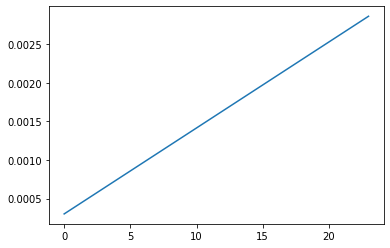

In [0]:
train_model(EPOCHS=24, total_steps=None, epochs=24, steps_per_epoch=5,
                       pct_start=0.21, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85,
                       max_momentum=0.95, div_factor=10.0, final_div_factor=10.0, last_epoch=-1)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00030000000000000003


Loss=1.3986661434173584 Batch_id=390 Accuracy=42.16: 100%|██████████| 391/391 [00:20<00:00, 18.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 5366/10000 (53.66%)

EPOCH: 2 LR: 0.0009683168316831684


Loss=1.1299165487289429 Batch_id=390 Accuracy=57.58: 100%|██████████| 391/391 [00:21<00:00, 18.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 6531/10000 (65.31%)

EPOCH: 3 LR: 0.0016366336633663369


Loss=0.8775194883346558 Batch_id=390 Accuracy=66.90: 100%|██████████| 391/391 [00:20<00:00, 18.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6895/10000 (68.95%)

EPOCH: 4 LR: 0.002304950495049505


Loss=0.8981305956840515 Batch_id=390 Accuracy=71.93: 100%|██████████| 391/391 [00:20<00:00, 18.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7341/10000 (73.41%)

EPOCH: 5 LR: 0.0029732673267326734


Loss=0.5467349290847778 Batch_id=390 Accuracy=75.71: 100%|██████████| 391/391 [00:20<00:00, 18.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7673/10000 (76.73%)

EPOCH: 6 LR: 0.0028496202531645572


Loss=0.5477104783058167 Batch_id=390 Accuracy=80.02: 100%|██████████| 391/391 [00:20<00:00, 19.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7989/10000 (79.89%)

EPOCH: 7 LR: 0.002692974683544304


Loss=0.6993889808654785 Batch_id=390 Accuracy=83.22: 100%|██████████| 391/391 [00:20<00:00, 18.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8252/10000 (82.52%)

EPOCH: 8 LR: 0.0025363291139240507


Loss=0.5084601640701294 Batch_id=390 Accuracy=85.78: 100%|██████████| 391/391 [00:20<00:00, 18.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8353/10000 (83.53%)

EPOCH: 9 LR: 0.002379683544303798


Loss=0.3806641101837158 Batch_id=390 Accuracy=87.97: 100%|██████████| 391/391 [00:20<00:00, 18.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8330/10000 (83.30%)

EPOCH: 10 LR: 0.0022230379746835446


Loss=0.20653681457042694 Batch_id=390 Accuracy=89.64: 100%|██████████| 391/391 [00:20<00:00, 18.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8494/10000 (84.94%)

EPOCH: 11 LR: 0.0020663924050632913


Loss=0.19615474343299866 Batch_id=390 Accuracy=91.51: 100%|██████████| 391/391 [00:20<00:00, 18.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8662/10000 (86.62%)

EPOCH: 12 LR: 0.0019097468354430382


Loss=0.1506621092557907 Batch_id=390 Accuracy=92.85: 100%|██████████| 391/391 [00:20<00:00, 18.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8682/10000 (86.82%)

EPOCH: 13 LR: 0.001753101265822785


Loss=0.335458368062973 Batch_id=390 Accuracy=94.29: 100%|██████████| 391/391 [00:22<00:00, 17.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8737/10000 (87.37%)

EPOCH: 14 LR: 0.0015964556962025317


Loss=0.10190793126821518 Batch_id=390 Accuracy=95.37: 100%|██████████| 391/391 [00:21<00:00, 18.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8758/10000 (87.58%)

EPOCH: 15 LR: 0.0014398101265822784


Loss=0.15156763792037964 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [00:21<00:00, 18.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8840/10000 (88.40%)

EPOCH: 16 LR: 0.0012831645569620252


Loss=0.09534414857625961 Batch_id=390 Accuracy=96.84: 100%|██████████| 391/391 [00:21<00:00, 18.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8842/10000 (88.42%)

EPOCH: 17 LR: 0.001126518987341772


Loss=0.07835958898067474 Batch_id=390 Accuracy=97.27: 100%|██████████| 391/391 [00:21<00:00, 18.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8841/10000 (88.41%)

EPOCH: 18 LR: 0.0009698734177215193


Loss=0.08314517140388489 Batch_id=390 Accuracy=97.84: 100%|██████████| 391/391 [00:21<00:00, 18.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8825/10000 (88.25%)

EPOCH: 19 LR: 0.000813227848101266


Loss=0.0706079751253128 Batch_id=390 Accuracy=98.21: 100%|██████████| 391/391 [00:20<00:00, 18.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8856/10000 (88.56%)

EPOCH: 20 LR: 0.0006565822784810127


Loss=0.06162222474813461 Batch_id=390 Accuracy=98.55: 100%|██████████| 391/391 [00:20<00:00, 18.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8907/10000 (89.07%)

EPOCH: 21 LR: 0.0004999367088607595


Loss=0.024096885696053505 Batch_id=390 Accuracy=98.69: 100%|██████████| 391/391 [00:20<00:00, 18.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8907/10000 (89.07%)

EPOCH: 22 LR: 0.0003432911392405066


Loss=0.04122127965092659 Batch_id=390 Accuracy=98.87: 100%|██████████| 391/391 [00:20<00:00, 19.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8940/10000 (89.40%)

EPOCH: 23 LR: 0.00018664556962025335


Loss=0.03512401506304741 Batch_id=390 Accuracy=98.97: 100%|██████████| 391/391 [00:20<00:00, 18.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8916/10000 (89.16%)

EPOCH: 24 LR: 3.000000000000008e-05


Loss=0.03127741441130638 Batch_id=390 Accuracy=99.14: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]



Test set: Average loss: 0.0028, Accuracy: 8934/10000 (89.34%)

[0.00030000000000000003, 0.0009683168316831684, 0.0016366336633663369, 0.002304950495049505, 0.0029732673267326734, 0.0028496202531645572, 0.002692974683544304, 0.0025363291139240507, 0.002379683544303798, 0.0022230379746835446, 0.0020663924050632913, 0.0019097468354430382, 0.001753101265822785, 0.0015964556962025317, 0.0014398101265822784, 0.0012831645569620252, 0.001126518987341772, 0.0009698734177215193, 0.000813227848101266, 0.0006565822784810127, 0.0004999367088607595, 0.0003432911392405066, 0.00018664556962025335, 3.000000000000008e-05]


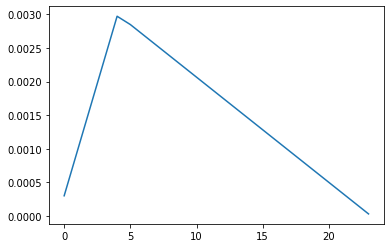

In [0]:

train_model(EPOCHS=24, total_steps=24, epochs=None, steps_per_epoch=None,
                       pct_start=0.21, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85,
                       max_momentum=0.95, div_factor=10.0, final_div_factor=10.0, last_epoch=-1)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00011999999999999988


Loss=1.4435842037200928 Batch_id=390 Accuracy=36.27: 100%|██████████| 391/391 [00:21<00:00, 18.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0114, Accuracy: 4777/10000 (47.77%)

EPOCH: 2 LR: 0.0005338790916275898


Loss=1.2013964653015137 Batch_id=390 Accuracy=53.43: 100%|██████████| 391/391 [00:21<00:00, 18.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 6090/10000 (60.90%)

EPOCH: 3 LR: 0.0015376053908346945


Loss=0.6994494199752808 Batch_id=390 Accuracy=63.03: 100%|██████████| 391/391 [00:21<00:00, 18.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 6876/10000 (68.76%)

EPOCH: 4 LR: 0.0025542048296233154


Loss=0.5816994905471802 Batch_id=390 Accuracy=69.44: 100%|██████████| 391/391 [00:21<00:00, 18.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7365/10000 (73.65%)

EPOCH: 5 LR: 0.002999303446500463


Loss=0.5903280973434448 Batch_id=390 Accuracy=75.32: 100%|██████████| 391/391 [00:21<00:00, 18.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7867/10000 (78.67%)

EPOCH: 6 LR: 0.0029810630886524486


Loss=0.4579579830169678 Batch_id=390 Accuracy=79.48: 100%|██████████| 391/391 [00:21<00:00, 18.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8007/10000 (80.07%)

EPOCH: 7 LR: 0.002921589495900446


Loss=0.48946818709373474 Batch_id=390 Accuracy=82.57: 100%|██████████| 391/391 [00:21<00:00, 18.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8227/10000 (82.27%)

EPOCH: 8 LR: 0.002823175397065313


Loss=0.4480389654636383 Batch_id=390 Accuracy=84.95: 100%|██████████| 391/391 [00:22<00:00, 17.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8260/10000 (82.60%)

EPOCH: 9 LR: 0.002688516585131005


Loss=0.2574055790901184 Batch_id=390 Accuracy=87.49: 100%|██████████| 391/391 [00:22<00:00, 17.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8484/10000 (84.84%)

EPOCH: 10 LR: 0.0025213016807803003


Loss=0.47629404067993164 Batch_id=390 Accuracy=89.36: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8347/10000 (83.47%)

EPOCH: 11 LR: 0.002326111092423142


Loss=0.3677007555961609 Batch_id=390 Accuracy=90.77: 100%|██████████| 391/391 [00:21<00:00, 17.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8612/10000 (86.12%)

EPOCH: 12 LR: 0.002108291548067566


Loss=0.24523527920246124 Batch_id=390 Accuracy=92.64: 100%|██████████| 391/391 [00:21<00:00, 17.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8579/10000 (85.79%)

EPOCH: 13 LR: 0.0018738096358995374


Loss=0.15361374616622925 Batch_id=390 Accuracy=93.96: 100%|██████████| 391/391 [00:21<00:00, 17.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8668/10000 (86.68%)

EPOCH: 14 LR: 0.0016290883654387182


Loss=0.205110102891922 Batch_id=390 Accuracy=95.30: 100%|██████████| 391/391 [00:21<00:00, 18.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8695/10000 (86.95%)

EPOCH: 15 LR: 0.0013808312262434301


Loss=0.17016589641571045 Batch_id=390 Accuracy=96.27: 100%|██████████| 391/391 [00:21<00:00, 17.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8802/10000 (88.02%)

EPOCH: 16 LR: 0.0011358385636095303


Loss=0.08558562397956848 Batch_id=390 Accuracy=97.03: 100%|██████████| 391/391 [00:21<00:00, 17.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8815/10000 (88.15%)

EPOCH: 17 LR: 0.0009008213011634747


Loss=0.061535365879535675 Batch_id=390 Accuracy=97.67: 100%|██████████| 391/391 [00:21<00:00, 18.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8815/10000 (88.15%)

EPOCH: 18 LR: 0.0006822171129246319


Loss=0.020255234092473984 Batch_id=390 Accuracy=98.14: 100%|██████████| 391/391 [00:21<00:00, 18.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8866/10000 (88.66%)

EPOCH: 19 LR: 0.000486014080315204


Loss=0.11075880378484726 Batch_id=390 Accuracy=98.41: 100%|██████████| 391/391 [00:21<00:00, 18.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8898/10000 (88.98%)

EPOCH: 20 LR: 0.00031758666456584747


Loss=0.089085154235363 Batch_id=390 Accuracy=98.56: 100%|██████████| 391/391 [00:21<00:00, 18.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8910/10000 (89.10%)

EPOCH: 21 LR: 0.0001815484876174944


Loss=0.02728680707514286 Batch_id=390 Accuracy=98.76: 100%|██████████| 391/391 [00:22<00:00, 17.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8917/10000 (89.17%)

EPOCH: 22 LR: 8.162595419577061e-05


Loss=0.05599714443087578 Batch_id=390 Accuracy=98.79: 100%|██████████| 391/391 [00:22<00:00, 17.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8912/10000 (89.12%)

EPOCH: 23 LR: 2.055617684578616e-05


Loss=0.022744070738554 Batch_id=390 Accuracy=98.79: 100%|██████████| 391/391 [00:22<00:00, 17.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8912/10000 (89.12%)

EPOCH: 24 LR: 1.2e-08


Loss=0.031161075457930565 Batch_id=390 Accuracy=98.83: 100%|██████████| 391/391 [00:22<00:00, 17.40it/s]



Test set: Average loss: 0.0028, Accuracy: 8906/10000 (89.06%)

[0.00011999999999999988, 0.0005338790916275898, 0.0015376053908346945, 0.0025542048296233154, 0.002999303446500463, 0.0029810630886524486, 0.002921589495900446, 0.002823175397065313, 0.002688516585131005, 0.0025213016807803003, 0.002326111092423142, 0.002108291548067566, 0.0018738096358995374, 0.0016290883654387182, 0.0013808312262434301, 0.0011358385636095303, 0.0009008213011634747, 0.0006822171129246319, 0.000486014080315204, 0.00031758666456584747, 0.0001815484876174944, 8.162595419577061e-05, 2.055617684578616e-05, 1.2e-08]


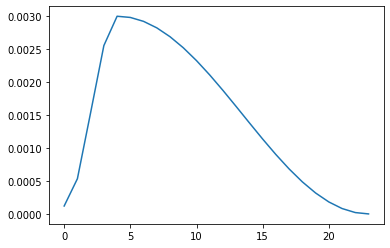

In [0]:
train_model(EPOCHS=24, total_steps=24, epochs=None, steps_per_epoch=None,
                       pct_start=0.21, anneal_strategy='cos', cycle_momentum=False, base_momentum=0.85,
                       max_momentum=0.95, div_factor=25.0, final_div_factor=10000.0, last_epoch=-1)


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00011999999999999988


Loss=1.9324638843536377 Batch_id=97 Accuracy=24.29: 100%|██████████| 98/98 [00:21<00:00,  4.58it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 3377/10000 (33.77%)

EPOCH: 2 LR: 0.0005338790916275898


Loss=1.3706285953521729 Batch_id=97 Accuracy=41.59: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 4954/10000 (49.54%)

EPOCH: 3 LR: 0.0015376053908346945


Loss=1.1460176706314087 Batch_id=97 Accuracy=53.64: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 5963/10000 (59.63%)

EPOCH: 4 LR: 0.0025542048296233154


Loss=0.8385517597198486 Batch_id=97 Accuracy=62.02: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 6338/10000 (63.38%)

EPOCH: 5 LR: 0.002999303446500463


Loss=0.8202406764030457 Batch_id=97 Accuracy=68.17: 100%|██████████| 98/98 [00:21<00:00,  4.59it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 6823/10000 (68.23%)

EPOCH: 6 LR: 0.0029810630886524486


Loss=0.7616177797317505 Batch_id=97 Accuracy=72.29: 100%|██████████| 98/98 [00:20<00:00,  4.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7411/10000 (74.11%)

EPOCH: 7 LR: 0.002921589495900446


Loss=0.7945994138717651 Batch_id=97 Accuracy=75.49: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7549/10000 (75.49%)

EPOCH: 8 LR: 0.002823175397065313


Loss=0.6364094614982605 Batch_id=97 Accuracy=77.79: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7871/10000 (78.71%)

EPOCH: 9 LR: 0.002688516585131005


Loss=0.6293535828590393 Batch_id=97 Accuracy=79.51: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7904/10000 (79.04%)

EPOCH: 10 LR: 0.0025213016807803003


Loss=0.5680403113365173 Batch_id=97 Accuracy=81.04: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8174/10000 (81.74%)

EPOCH: 11 LR: 0.002326111092423142


Loss=0.4848773181438446 Batch_id=97 Accuracy=82.28: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8119/10000 (81.19%)

EPOCH: 12 LR: 0.002108291548067566


Loss=0.4932928681373596 Batch_id=97 Accuracy=83.88: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8231/10000 (82.31%)

EPOCH: 13 LR: 0.0018738096358995374


Loss=0.43753764033317566 Batch_id=97 Accuracy=84.83: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8285/10000 (82.85%)

EPOCH: 14 LR: 0.0016290883654387182


Loss=0.437062531709671 Batch_id=97 Accuracy=85.87: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8286/10000 (82.86%)

EPOCH: 15 LR: 0.0013808312262434301


Loss=0.40152740478515625 Batch_id=97 Accuracy=86.47: 100%|██████████| 98/98 [00:20<00:00,  4.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8443/10000 (84.43%)

EPOCH: 16 LR: 0.0011358385636095303


Loss=0.39977699518203735 Batch_id=97 Accuracy=87.51: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8475/10000 (84.75%)

EPOCH: 17 LR: 0.0009008213011634747


Loss=0.38549304008483887 Batch_id=97 Accuracy=88.18: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8486/10000 (84.86%)

EPOCH: 18 LR: 0.0006822171129246319


Loss=0.3048587441444397 Batch_id=97 Accuracy=88.41: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8544/10000 (85.44%)

EPOCH: 19 LR: 0.000486014080315204


Loss=0.35013842582702637 Batch_id=97 Accuracy=88.97: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8541/10000 (85.41%)

EPOCH: 20 LR: 0.00031758666456584747


Loss=0.34835827350616455 Batch_id=97 Accuracy=89.35: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8538/10000 (85.38%)

EPOCH: 21 LR: 0.0001815484876174944


Loss=0.3932684063911438 Batch_id=97 Accuracy=89.70: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8586/10000 (85.86%)

EPOCH: 22 LR: 8.162595419577061e-05


Loss=0.3678640127182007 Batch_id=97 Accuracy=89.67: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8575/10000 (85.75%)

EPOCH: 23 LR: 2.055617684578616e-05


Loss=0.2894511818885803 Batch_id=97 Accuracy=89.79: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8581/10000 (85.81%)

EPOCH: 24 LR: 1.2e-08


Loss=0.28469333052635193 Batch_id=97 Accuracy=89.94: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]



Test set: Average loss: 0.0008, Accuracy: 8585/10000 (85.85%)

[0.00011999999999999988, 0.0005338790916275898, 0.0015376053908346945, 0.0025542048296233154, 0.002999303446500463, 0.0029810630886524486, 0.002921589495900446, 0.002823175397065313, 0.002688516585131005, 0.0025213016807803003, 0.002326111092423142, 0.002108291548067566, 0.0018738096358995374, 0.0016290883654387182, 0.0013808312262434301, 0.0011358385636095303, 0.0009008213011634747, 0.0006822171129246319, 0.000486014080315204, 0.00031758666456584747, 0.0001815484876174944, 8.162595419577061e-05, 2.055617684578616e-05, 1.2e-08]


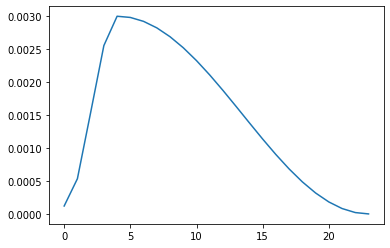

In [33]:
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.optim as optim

  
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = New_Resnet().to(device)

EPOCHS = 24
lr = 0.003
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
max_lr = 0.003
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9,weight_decay=0.0005)
scheduler = OneCycleLR(optimizer, max_lr, total_steps=EPOCHS, epochs=None, steps_per_epoch=None,
                       pct_start=0.21, anneal_strategy='cos', cycle_momentum=False, base_momentum=0.85,
                       max_momentum=0.95, div_factor=25.0, final_div_factor=10000.0, last_epoch=-1)


l_rate = []

train_test = train_and_test.Train_test()

for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
    l_rate.append(optimizer.param_groups[0]['lr'])    
    train_acc,train_acc_epoch_end,train_losses,test_losses,test_acc = train_test.train_and_test(model, device, trainloader,testloader, optimizer, criterion, epoch)
    scheduler.step()
print(l_rate)
plt.plot(l_rate)

In [36]:
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.optim as optim

  
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = dnn_architecture.New_Resnet().to(device)

EPOCHS = 24
lr = 0.0025
max_lr = lr

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9,weight_decay=0.0005)
scheduler = OneCycleLR(optimizer, max_lr, total_steps=EPOCHS, epochs=None, steps_per_epoch=None,
                       pct_start=0.21, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85,
                       max_momentum=0.95, div_factor=10.0, final_div_factor=10.0, last_epoch=-1)


l_rate = []

train_test = train_and_test.Train_test()

for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
    l_rate.append(optimizer.param_groups[0]['lr'])    
    train_acc,train_acc_epoch_end,train_losses,test_losses,test_acc = train_test.train_and_test(model, device, trainloader,testloader, optimizer, criterion, epoch)
    scheduler.step()
print(l_rate)


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00025


Loss=1.6840507984161377 Batch_id=97 Accuracy=29.00: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 4077/10000 (40.77%)

EPOCH: 2 LR: 0.000806930693069307


Loss=1.4269448518753052 Batch_id=97 Accuracy=46.37: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 5300/10000 (53.00%)

EPOCH: 3 LR: 0.001363861386138614


Loss=1.0883151292800903 Batch_id=97 Accuracy=55.91: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 5938/10000 (59.38%)

EPOCH: 4 LR: 0.001920792079207921


Loss=0.9844401478767395 Batch_id=97 Accuracy=62.31: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 6266/10000 (62.66%)

EPOCH: 5 LR: 0.002477722772277228


Loss=0.8888382911682129 Batch_id=97 Accuracy=67.68: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 7102/10000 (71.02%)

EPOCH: 6 LR: 0.0023746835443037976


Loss=0.8006546497344971 Batch_id=97 Accuracy=72.01: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7296/10000 (72.96%)

EPOCH: 7 LR: 0.002244145569620253


Loss=0.6053320169448853 Batch_id=97 Accuracy=74.86: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7377/10000 (73.77%)

EPOCH: 8 LR: 0.002113607594936709


Loss=0.6241700649261475 Batch_id=97 Accuracy=77.06: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7700/10000 (77.00%)

EPOCH: 9 LR: 0.0019830696202531644


Loss=0.6125646233558655 Batch_id=97 Accuracy=78.62: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7877/10000 (78.77%)

EPOCH: 10 LR: 0.0018525316455696205


Loss=0.5468570590019226 Batch_id=97 Accuracy=80.41: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8057/10000 (80.57%)

EPOCH: 11 LR: 0.001721993670886076


Loss=0.5484911799430847 Batch_id=97 Accuracy=81.62: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7982/10000 (79.82%)

EPOCH: 12 LR: 0.0015914556962025317


Loss=0.4951664209365845 Batch_id=97 Accuracy=82.60: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8112/10000 (81.12%)

EPOCH: 13 LR: 0.0014609177215189873


Loss=0.46737951040267944 Batch_id=97 Accuracy=83.85: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8176/10000 (81.76%)

EPOCH: 14 LR: 0.001330379746835443


Loss=0.45472532510757446 Batch_id=97 Accuracy=84.69: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8264/10000 (82.64%)

EPOCH: 15 LR: 0.0011998417721518985


Loss=0.44085580110549927 Batch_id=97 Accuracy=85.43: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8330/10000 (83.30%)

EPOCH: 16 LR: 0.0010693037974683543


Loss=0.334077388048172 Batch_id=97 Accuracy=86.02: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8345/10000 (83.45%)

EPOCH: 17 LR: 0.0009387658227848099


Loss=0.3750123381614685 Batch_id=97 Accuracy=86.70: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8409/10000 (84.09%)

EPOCH: 18 LR: 0.0008082278481012658


Loss=0.3310893774032593 Batch_id=97 Accuracy=87.20: 100%|██████████| 98/98 [00:20<00:00,  4.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8382/10000 (83.82%)

EPOCH: 19 LR: 0.0006776898734177214


Loss=0.38618695735931396 Batch_id=97 Accuracy=87.55: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8420/10000 (84.20%)

EPOCH: 20 LR: 0.000547151898734177


Loss=0.4001399576663971 Batch_id=97 Accuracy=88.30: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8481/10000 (84.81%)

EPOCH: 21 LR: 0.0004166139240506326


Loss=0.3613761365413666 Batch_id=97 Accuracy=88.43: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8457/10000 (84.57%)

EPOCH: 22 LR: 0.00028607594936708863


Loss=0.35223954916000366 Batch_id=97 Accuracy=88.94: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8498/10000 (84.98%)

EPOCH: 23 LR: 0.00015553797468354424


Loss=0.3499160706996918 Batch_id=97 Accuracy=89.13: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8488/10000 (84.88%)

EPOCH: 24 LR: 2.499999999999985e-05


Loss=0.3450978994369507 Batch_id=97 Accuracy=89.22: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]



Test set: Average loss: 0.0009, Accuracy: 8509/10000 (85.09%)

[0.00025, 0.000806930693069307, 0.001363861386138614, 0.001920792079207921, 0.002477722772277228, 0.0023746835443037976, 0.002244145569620253, 0.002113607594936709, 0.0019830696202531644, 0.0018525316455696205, 0.001721993670886076, 0.0015914556962025317, 0.0014609177215189873, 0.001330379746835443, 0.0011998417721518985, 0.0010693037974683543, 0.0009387658227848099, 0.0008082278481012658, 0.0006776898734177214, 0.000547151898734177, 0.0004166139240506326, 0.00028607594936708863, 0.00015553797468354424, 2.499999999999985e-05]


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.0002499999999999998


Loss=1.4968249797821045 Batch_id=97 Accuracy=30.45: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 4419/10000 (44.19%)

EPOCH: 2 LR: 0.0005733430403340543


Loss=1.3907934427261353 Batch_id=97 Accuracy=49.74: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5474/10000 (54.74%)

EPOCH: 3 LR: 0.001357504211589605


Loss=1.1462923288345337 Batch_id=97 Accuracy=57.89: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 5898/10000 (58.98%)

EPOCH: 4 LR: 0.002151722523143215


Loss=1.0141844749450684 Batch_id=97 Accuracy=63.00: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 6635/10000 (66.35%)

EPOCH: 5 LR: 0.0024994558175784865


Loss=0.8385847210884094 Batch_id=97 Accuracy=67.27: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 6976/10000 (69.76%)

EPOCH: 6 LR: 0.0024843769856462126


Loss=0.7918258905410767 Batch_id=97 Accuracy=70.67: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 7030/10000 (70.30%)

EPOCH: 7 LR: 0.0024353110753621695


Loss=0.7579851746559143 Batch_id=97 Accuracy=73.09: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7356/10000 (73.56%)

EPOCH: 8 LR: 0.0023541191190553593


Loss=0.645702600479126 Batch_id=97 Accuracy=75.12: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7449/10000 (74.49%)

EPOCH: 9 LR: 0.0022430251548336984


Loss=0.6540614366531372 Batch_id=97 Accuracy=76.87: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7477/10000 (74.77%)

EPOCH: 10 LR: 0.0021050723069329755


Loss=0.6456294059753418 Batch_id=97 Accuracy=78.09: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7636/10000 (76.36%)

EPOCH: 11 LR: 0.001944039427406802


Loss=0.6166872978210449 Batch_id=97 Accuracy=79.39: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7845/10000 (78.45%)

EPOCH: 12 LR: 0.0017643375845060804


Loss=0.5906665325164795 Batch_id=97 Accuracy=80.71: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8017/10000 (80.17%)

EPOCH: 13 LR: 0.0015708892331740513


Loss=0.5159890651702881 Batch_id=97 Accuracy=81.97: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 8004/10000 (80.04%)

EPOCH: 14 LR: 0.0013689933774604526


Loss=0.49032655358314514 Batch_id=97 Accuracy=82.49: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8095/10000 (80.95%)

EPOCH: 15 LR: 0.0011641804183725036


Loss=0.4770241379737854 Batch_id=97 Accuracy=83.57: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8186/10000 (81.86%)

EPOCH: 16 LR: 0.0009620606632205155


Loss=0.45579391717910767 Batch_id=97 Accuracy=84.39: 100%|██████████| 98/98 [00:20<00:00,  4.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8172/10000 (81.72%)

EPOCH: 17 LR: 0.0007681706461424513


Loss=0.39536166191101074 Batch_id=97 Accuracy=84.90: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8278/10000 (82.78%)

EPOCH: 18 LR: 0.0005878214694486992


Loss=0.3948873281478882 Batch_id=97 Accuracy=85.69: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8280/10000 (82.80%)

EPOCH: 19 LR: 0.0004259533200733236


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8333/10000 (83.33%)

EPOCH: 20 LR: 0.00028700014626740925


Loss=0.4040132164955139 Batch_id=97 Accuracy=86.94: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8340/10000 (83.40%)

EPOCH: 21 LR: 0.00017476820135723831


Loss=0.37363284826278687 Batch_id=97 Accuracy=87.29: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8403/10000 (84.03%)

EPOCH: 22 LR: 9.233178153863692e-05


Loss=0.42477431893348694 Batch_id=97 Accuracy=87.69: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8430/10000 (84.30%)

EPOCH: 23 LR: 4.194901369382836e-05


Loss=0.3390030264854431 Batch_id=97 Accuracy=87.93: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8418/10000 (84.18%)

EPOCH: 24 LR: 2.5e-05


Loss=0.3426876962184906 Batch_id=97 Accuracy=87.91: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]



Test set: Average loss: 0.0009, Accuracy: 8445/10000 (84.45%)

[0.0002499999999999998, 0.0005733430403340543, 0.001357504211589605, 0.002151722523143215, 0.0024994558175784865, 0.0024843769856462126, 0.0024353110753621695, 0.0023541191190553593, 0.0022430251548336984, 0.0021050723069329755, 0.001944039427406802, 0.0017643375845060804, 0.0015708892331740513, 0.0013689933774604526, 0.0011641804183725036, 0.0009620606632205155, 0.0007681706461424513, 0.0005878214694486992, 0.0004259533200733236, 0.00028700014626740925, 0.00017476820135723831, 9.233178153863692e-05, 4.194901369382836e-05, 2.5e-05]


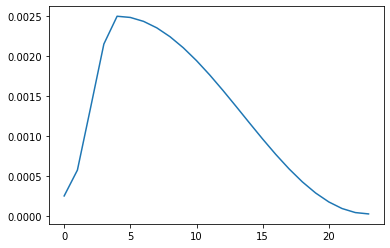

In [38]:
train_acc,train_acc_epoch_end,train_losses,test_losses,test_acc = train_model(EPOCHS=24,lr=0.0025,max_lr=0.0025, total_steps=24,
                                                                              epochs=None, steps_per_epoch=None,
                        pct_start=0.21, anneal_strategy='cos', cycle_momentum=True, base_momentum=0.85,
                       max_momentum=0.95, div_factor=10.0, final_div_factor=10.0, last_epoch=-1)


In [34]:
len(train_acc)

2352

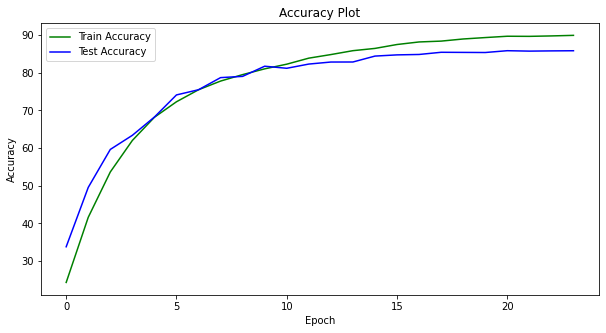

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.plot(train_acc_epoch_end,color = 'g',label="Train Accuracy")
ax.plot(test_acc,color = 'b',label="Test Accuracy")
ax.set(title="Accuracy Plot", xlabel="Epoch", ylabel="Accuracy")
ax.legend()
plt.show()

In [0]:
misclassify = show_images.show_misclassified_images(model, device, testloader,classes,num=25)

In [0]:
len(misclassify[1])

In [0]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [0]:
evaluate.evaluate_accuracy(model, device, testloader)

In [0]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

In [0]:
import torch
from torch.nn import functional as F
import warnings

class GradCam(object):

	def __init__(self, model, target_layers, num_classes):
		super(GradCam, self).__init__()
		self.model = model
		self.target_layers = target_layers
		self.num_classes = num_classes
		self.device = next(model.parameters()).device

		self.activations_map = {}
		self.gradients_map = {}

		self.model.eval()
		self.register_hooks()

	def register_hooks(self):
		def _wrap_forward_hook(layer_name):
			def _forward_hook(module, input, output):
				self.activations_map[layer_name] = output.detach()
			return _forward_hook

		def _wrap_backward_hook(layer_name):
			def _backward_hook(module, grad_out, grad_in):
				self.gradients_map[layer_name] = grad_out[0].detach()
			return _backward_hook

		for name, module in self.model.named_modules():
			if name in self.target_layers:
				module.register_forward_hook(_wrap_forward_hook(name))
				module.register_backward_hook(_wrap_backward_hook(name))

	def make_one_hots(self, target_class=None):
		one_hots = torch.zeros_like(self.output)
		if target_class:
			ids = torch.LongTensor([[target_class]] * self.batch_size).to(self.device)
			one_hots.scatter_(1,ids,1.0)
		else:
			one_hots = torch.zeros((self.batch_size, self.num_classes)).to(self.device)
			for i in range(len(self.pred)):
			  one_hots[i][self.pred[i][0]] = 1.0
		return one_hots

	def forward(self, data):
		self.batch_size, self.img_ch, self.img_h, self.img_w = data.shape
		data = data.to(self.device)
		self.output = self.model(data)
		self.pred = self.output.argmax(dim=1, keepdim=True)

	def backward(self, target_class=None):
		one_hots = self.make_one_hots(target_class)
		self.model.zero_grad()
		self.output.backward(gradient=one_hots, retain_graph=True)

	def __call__(self, data, target_layers, target_class=None,name=None):
		self.forward(data)
		self.backward(target_class)

		output = self.output
		saliency_maps = {}
		for target_layer in target_layers:
			activations = self.activations_map[target_layer]	#[64, 512, 4, 4]
			grads = self.gradients_map[target_layer]	#[64, 512, 4, 4]
			weights = F.adaptive_avg_pool2d(grads, 1)	#[64, 512, 1, 1]

			saliency_map = torch.mul(activations, weights).sum(dim=1, keepdim=True)	
			saliency_map = F.relu(saliency_map)	#[64,1,4,4]
			saliency_map = F.interpolate(saliency_map, (self.img_h, self.img_w),
				mode="bilinear", align_corners=False)	#[64,1,32,32]

			saliency_map = saliency_map.view(self.batch_size, -1)
			saliency_map -= saliency_map.min(dim=1, keepdim=True)[0]
			saliency_map /= saliency_map.max(dim=1, keepdim=True)[0]
			saliency_map = saliency_map.view(self.batch_size, 1,
											self.img_h, self.img_w)
			saliency_maps[target_layer] = saliency_map
    
		if name =='misclassify':
			return saliency_maps
		else:
			return saliency_maps, self.pred

import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np


def denormalize(tensor, mean=[0.4914, 0.4822, 0.4465],
						std=[0.2023, 0.1994, 0.2010]):
	single_img = False
	if tensor.ndimension() == 3:
		single_img = True
		tensor = tensor[None,:,:,:]

	if not tensor.ndimension() == 4:
	    raise TypeError('tensor should be 4D')

	mean = torch.FloatTensor(mean).view(1, 3, 1, 1).expand_as(tensor).to(tensor.device)
	std = torch.FloatTensor(std).view(1, 3, 1, 1).expand_as(tensor).to(tensor.device)
	ret = tensor.mul(std).add(mean)
	return ret[0] if single_img else ret

class VisualizeCam(object):

	def __init__(self, model, classes, target_layers):
		super(VisualizeCam, self).__init__()
		self.model = model
		self.classes = classes
		self.target_layers = target_layers
		self.device = next(model.parameters()).device

		self.gcam = GradCam(model, target_layers, len(classes))
		
	def visualize_cam(self, mask, img):
	    heatmap = (255 * mask.squeeze()).type(torch.uint8).cpu().numpy()
	    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
	    heatmap = torch.from_numpy(heatmap).permute(2, 0, 1).float().div(255)
	    b, g, r = heatmap.split(1)
	    heatmap = torch.cat([r, g, b])
	    
	    result = heatmap+img.cpu()
	    result = result.div(result.max()).squeeze()
	    return heatmap, result

	def plot_heatmaps(self, img_data, pred_class,target_class, img_name):
		warnings.filterwarnings("ignore")
		fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 4),
			subplot_kw={'xticks': [], 'yticks': []})
		fig.suptitle('GradCam at different conv layers for the class: Predicted: %s, Target: %s \n' % 
		(	pred_class,target_class))

		for ax, data in zip(axs.flat, img_data):
			img = data["img"]
			npimg = img.cpu().numpy()
			ax.imshow(np.transpose(npimg, (1, 2, 0)))
			ax.set_title("%s" % (data["label"]))

		# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/eva_files/images/'+img_name)


	def __call__(self, images, target_layers,target_class, target_inds=None, metric="",pred=None,num=25,name=None):
		if name=='misclassify':
			masks_map = self.gcam(images, target_layers, target_inds,name)
		else:
			masks_map, pred = self.gcam(images, target_layers, target_inds,name)
		for i in range(min(len(images),num)):
			img = images[i]
			results_data = [{
				"img": denormalize(img),
				"label": "Result:"
			}]
			heatmaps_data = [{
				"img": denormalize(img),
				"label": "Heatmap:"
			}]
			for layer in target_layers:
				mask = masks_map[layer][i]
				heatmap, result = self.visualize_cam(mask, img)
				results_data.append({
					"img": result,
					"label": layer
				})
				heatmaps_data.append({
					"img": heatmap,
					"label": layer
				})
			if name=='misclassify':
				pred_class = pred[i]
			else:
				pred_class = self.classes[pred[i][0]]
			fname = "gradcam_%s.png" % (i)
			self.plot_heatmaps(results_data+heatmaps_data, pred_class,target_class[i], fname)

In [0]:
max(train_and_test.train_acc)

In [0]:
images=[]

for i in range(25):
  images.append(misclassify[0][i]*2-0.5)

target_layers = ["layer1","layer2","layer3","layer4"]
gradcam = VisualizeCam(model,classes, target_layers)
gradcam(torch.stack(images), target_layers,target_class=misclassify[2],pred=misclassify[1],num=25,name='misclassify')